## 4. adatelemzés laboratórium

Képi osztályozás ismert és ismeretlen osztályú teszthalmazokon 

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

In [3]:
train_dataset_full = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])  
)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


100.0%

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [4]:
total_size = len(train_dataset_full)
subset_size = total_size // 10
print(total_size, subset_size)

60000 6000


In [5]:
indices = np.random.choice(total_size, subset_size, replace=False)

In [6]:
train_subset = Subset(train_dataset_full, indices)

In [8]:
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)

In [9]:
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")

Image batch shape: torch.Size([64, 1, 28, 28])


A kiválasztott adathalmaz többdimenziós adattáblájának a méretei [64, 1, 28, 28]

## 2. feladat

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)    # 28 -> 26
        self.conv2 = nn.Conv2d(32, 64, 3)   # 26 -> 24 -> 12 (pool)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))          # [B, 32, 26, 26]
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # [B, 64, 12, 12]
        x = self.dropout1(x)
        x = x.view(x.size(0), -1)          # lapítás: [B, 64*12*12]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
cnn_model = ConvNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)


ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [22]:
epochs = 5

In [23]:
for epoch in range(epochs):
    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/5], Loss: 71.0768, Accuracy: 72.42%
Epoch [2/5], Loss: 41.7133, Accuracy: 84.00%
Epoch [3/5], Loss: 33.5446, Accuracy: 86.70%
Epoch [4/5], Loss: 28.4759, Accuracy: 88.63%
Epoch [5/5], Loss: 25.1303, Accuracy: 90.67%


In [24]:
test_dataset_full = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])  
)

In [25]:
test_size = len(test_dataset_full)  # 10000
subset_size = test_size // 10       # 1000

In [26]:
test_indices = np.random.choice(test_size, subset_size, replace=False)
test_subset = Subset(test_dataset_full, test_indices)

In [27]:
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

In [28]:
cnn_model.eval()
correct = 0
total = 0


In [30]:
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy a tesztkészlet 10%-án: {accuracy:.2f}%")

Accuracy a tesztkészlet 10%-án: 85.90%


## 3. feladat

In [41]:
from torchvision.datasets import MNIST
from torch.utils.data import ConcatDataset
from torch.utils.data import Dataset

In [33]:
mnist_test_full = MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])  
)

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [36]:
mnist_test_size = len(mnist_test_full)  # 10000
mnist_subset_size = mnist_test_size // 10  # 1000
print(mnist_test_size, mnist_subset_size)

10000 1000


In [37]:
mnist_indices = np.random.choice(mnist_test_size, mnist_subset_size, replace=False)
mnist_subset = Subset(mnist_test_full, mnist_indices)

In [42]:
class Wrapper(Dataset):
    def __init__(self, dataset, is_ood_flag):
        self.dataset = dataset
        self.is_ood_flag = is_ood_flag  # 0 vagy 1

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label, self.is_ood_flag

In [43]:
id_wrapped = Wrapper(test_subset, is_ood_flag=0)

In [44]:
ood_wrapped = Wrapper(mnist_subset, is_ood_flag=1)

In [45]:
combined_dataset = ConcatDataset([id_wrapped, ood_wrapped])

In [46]:
combined_loader = DataLoader(combined_dataset, batch_size=64, shuffle=False)

In [47]:
len(combined_dataset)

2000

## 4. feladat

In [49]:
cnn_model.eval()
correct = 0
total = 0

In [50]:
with torch.no_grad():
    for images, labels, is_ood in combined_loader:
        images, labels, is_ood = images.to(device), labels.to(device), is_ood.to(device)

        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Az ID képekre: predikció helyes, ha pred == label
        is_id = (is_ood == 0)
        id_correct = (predicted == labels) & is_id

        # OOD képekre: minden predikció hibás
        # (tehát nem adunk hozzá semmit a helyes predikciókhoz)
        correct += id_correct.sum().item()
        total += images.size(0)

accuracy = 100 * correct / total
print(f"OOD-aware accuracy a kombinált teszthalmazon: {accuracy:.2f}%")

OOD-aware accuracy a kombinált teszthalmazon: 42.95%


## 5. feladat

In [51]:
import torch.nn.functional as F

In [52]:
sample_image, sample_label = train_subset[0]  # az első minta
sample_image = sample_image.unsqueeze(0).to(device)  # [1, 1, 28, 28] alakra hozzuk

In [55]:
cnn_model.eval()
with torch.no_grad():
    logits = cnn_model(sample_image)            # Softmax előtti kimenet (logit vektor)
    probs = F.softmax(logits, dim=1)        # Softmax alkalmazása

In [56]:
print("Címke (label):", sample_label)
print("\nSoftmax előtti logit vektor:")
print(logits.cpu().numpy())

print("\nSoftmax utáni valószínűségi eloszlás:")
print(probs.cpu().numpy())

Címke (label): 1

Softmax előtti logit vektor:
[[ 1.4803214  6.46847   -3.4478786  0.8017349  1.5924792 -3.111581
   1.2230079 -2.2224257 -1.6256986 -3.4231977]]

Softmax utáni valószínűségi eloszlás:
[[6.6596512e-03 9.7673541e-01 4.8212707e-05 3.3786648e-03 7.4500814e-03
  6.7485969e-05 5.1487470e-03 1.6419834e-04 2.9821132e-04 4.9417406e-05]]


Kiválasztott példány: első

Különbség a két vektor között: 
    A softmax előtti vektorban nem valószínűségek vannak, ahogyan látszik vannak 1-nél nagyobb és 0-nál kisebb érték is.
    A softmax után viszont már valószínűségek vannak, minden érték 0 és 1 között van, az összegük pedig 1. Erősen látszik, hogy a második osztály a legesélyesebb.
    
Ugyanúgy 10 hosszú, mert ott is egyfajta "pontszám" jelenik meg.

## 6. feladat

In [ ]:
import matplotlib.pyplot as plt

In [58]:
cnn_model.eval()
softmax_max_values = []

In [59]:
with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        outputs = cnn_model(images)
        probs = F.softmax(outputs, dim=1)
        max_vals, _ = torch.max(probs, dim=1)  # batch-en belül max értékek
        softmax_max_values.extend(max_vals.cpu().numpy())

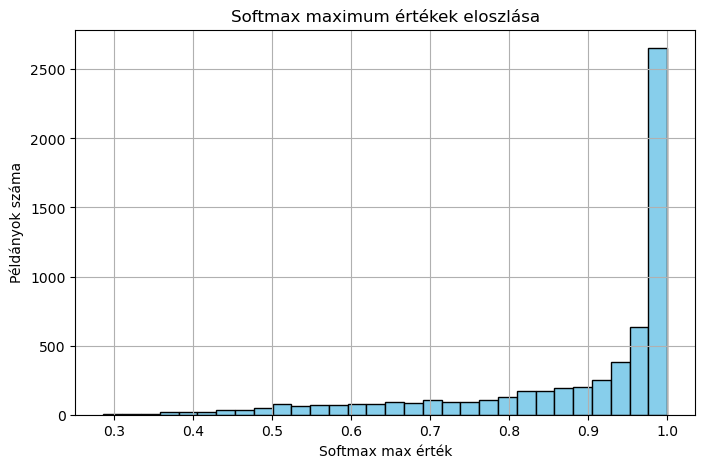

In [62]:
plt.figure(figsize=(8, 5))
plt.hist(softmax_max_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Softmax maximum értékek eloszlása")
plt.xlabel("Softmax max érték")
plt.ylabel("Példányok száma")
plt.grid(True)
plt.show()

In [63]:
print("Legnagyobb softmax max érték:", max(softmax_max_values))

Legnagyobb softmax max érték: 0.9999987


## 7. feladat

In [64]:
cnn_model.eval()
logit_max_values = []

In [65]:
with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        outputs = cnn_model(images)  # softmax előtt!
        max_logits, _ = torch.max(outputs, dim=1)
        logit_max_values.extend(max_logits.cpu().numpy())

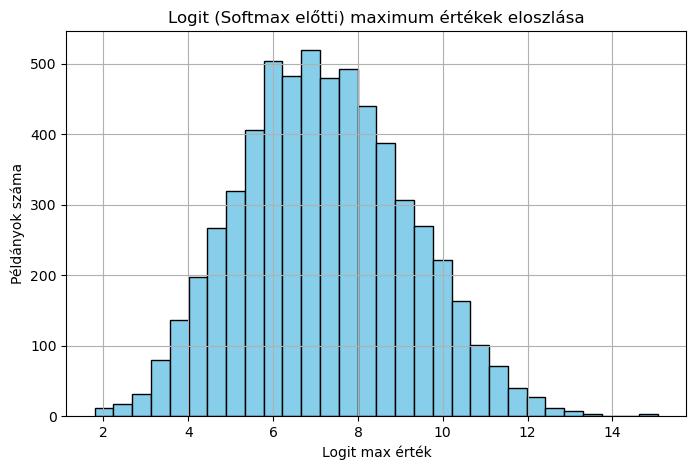

In [67]:
plt.figure(figsize=(8, 5))
plt.hist(logit_max_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Logit (Softmax előtti) maximum értékek eloszlása")
plt.xlabel("Logit max érték")
plt.ylabel("Példányok száma")
plt.grid(True)
plt.show()

In [69]:
XmaxMin = min(logit_max_values)
print(f"A logit max értékek legkisebb eleme: {min_val:.4f}")

A logit max értékek legkisebb eleme: 1.7917


Miért jobb ezzel dolgozni?

Ezek a vektorok még nincsenek normalizálva.
Látszik ebből is jól, hogy mennyire magabiztos a modell egy döntésben, ha magabiztos nagy különbség van az értékek között. 
Viszont ha a célunk kiszűrni az OOD példányokat, itt jobban látszik, hogy melyik ilyen. A vektor értékei alacsonyabbak és nincsen szélsőséges maximum. Vagyis a bizonytalanságot is jól mutatja, amit a szoftmax utáni érték nem, mert az mindenképpen választ egyet és elnyomja a többit. 

## 8. feladat

In [116]:
Thr = 1.7917*0.9

In [117]:
print(Thr)

1.61253


Mivel elmentettük az előző feladatban, hogy a legkisebb érték a softmax előtti maximumok közül az XmaxMin, így érdemes lehetne ezt választani küszöbnek, mert ez jól jelöli a határvonalat ami alatt kis eséllyel lesz ID példány. Azonban érdemes lehet ráhagyni még egy kicsi "biztonsági" tartalékot, így azokat a példányokat sem zárja ki ami pont ennyi vagy esetleg egy nagyon kicsivel kisebb értéket adnak. Én egy 10%-os ráhagyást választottam.

## 9. feladat

In [75]:
G_images = []
G_labels = []
B_images = []
B_labels = []

In [77]:
cnn_model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [78]:
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)

        correct_mask = predicted == labels

        # Helyes predikciók (G csoport)
        G_images.extend(images[correct_mask].cpu())
        G_labels.extend(labels[correct_mask].cpu())

        # Hibás predikciók (B csoport)
        B_images.extend(images[~correct_mask].cpu())
        B_labels.extend(labels[~correct_mask].cpu())

In [80]:
print(f"G csoport (helyes predikciók): {len(G_images)} példány")
print(f"B csoport (hibás predikciók): {len(B_images)} példány")

G csoport (helyes predikciók): 5600 példány
B csoport (hibás predikciók): 400 példány


## 10. feladat

In [81]:
logit_max_G = []

In [83]:
cnn_model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [85]:
with torch.no_grad():
    for i in range(len(G_images)):
        image = G_images[i].unsqueeze(0).to(device)  # alak: [1, 1, 28, 28]
        output = cnn_model(image)
        max_logit = torch.max(output).item()
        logit_max_G.append(max_logit)

In [86]:
XmaxMin_G = min(logit_max_G)

In [87]:
print(f"XmaxMin_G: {XmaxMin_G:.4f}")

XmaxMin_G: 1.8329


In [118]:
Thr_G = XmaxMin_G*0.9

In [119]:
print(Thr_G)

1.6496269941329957


Az előző feladat mintájára ismét az XmaxMin_G-nél egy nagyjából 6-7 %-kal kisebb értéket választottam, hogy alacsonyabb legyen a legtöbb helyes predikció értékénél, de mégse legyen túl alacsony, hogy sok OOD példányt ID-nek vegyen.

## 11. feladat

In [90]:
logit_max_B = []

In [92]:
cnn_model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [94]:
with torch.no_grad():
    for i in range(len(B_images)):
        image = B_images[i].unsqueeze(0).to(device)
        output = cnn_model(image)
        max_logit = torch.max(output).item()
        logit_max_B.append(max_logit)

In [95]:
XmaxMin_B = min(logit_max_B)

In [97]:
print(f"XmaxMin_B: {XmaxMin_B:.4f}")

XmaxMin_B: 1.7917


In [120]:
Thr_B = XmaxMin_B*0.9

In [121]:
print(Thr_B)

1.6125000715255737


Ismét, az előző feladatok példájára ha egy kicsit kisebb számot választunk az XmaxMin_B-nél, akkor biztosabbak lehetünk abban, hogy ha egy példánynak a logit max értéke még ennél is kisebb, akkor az OOD példány lesz.

## 12. feladat

In [113]:
from sklearn.metrics import accuracy_score

In [106]:
def ood_detector(image, threshold):
    output = cnn_model(image.unsqueeze(0).to(device))  # [1, 1, 28, 28] bemenet
    max_logit = torch.max(output).item()
    return 1 if max_logit < threshold else 0  # 1 = OOD, 0 = ID

In [122]:
thresholds = {
    "Thr": Thr,   # Alap küszöb
    "Thr_G": Thr_G,  # G csoport küszöb
    "Thr_B": Thr_B   # B csoport küszöb
}

In [123]:
results = {"Thr": [], "Thr_G": [], "Thr_B": []}
true_labels = []  # Az igaz label (ID vagy OOD)

In [124]:
cnn_model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [125]:
with torch.no_grad():
    for images, labels, is_ood in combined_loader:
        images, labels, is_ood = images.to(device), labels.to(device), is_ood.to(device)
        
        for threshold_name, threshold in thresholds.items():
            # Detektálás
            preds = [ood_detector(img, threshold) for img in images]
            results[threshold_name].extend(preds)
        
        true_labels.extend(is_ood.cpu().numpy())

In [126]:
for threshold_name in thresholds:
    acc = accuracy_score(true_labels, results[threshold_name])
    print(f"{threshold_name} - OOD Detektor Accuracy: {acc:.4f}")

Thr - OOD Detektor Accuracy: 0.5065
Thr_G - OOD Detektor Accuracy: 0.5075
Thr_B - OOD Detektor Accuracy: 0.5065


A legjobb accuracy 0.5075

## 13. feladat

Volt-e valamilyen előzetes elképzelés a várható eredményekről? Ha igen, akkor
mennyiben igazolták a kapott eredmények ezt? Ezen kívül egy mondatban foglalja össze
a konklúzióját.

Volt, azt sejtettem, hogy a Thr és Thr_B használata hasonló vagy ugyanazt az eredményt fogja adni, mivel a 8. feladatban az összes közül választottuk ki a legkisebb értéket, a 11. feladatban meg a rosszul osztályozottak közül a legkisebbet, de jellemzően a rosszul osztályozottaknál kisebb ez az érték, így a kettő meghatározott érték ugyanaz lett.